In [31]:
%matplotlib inline
import pandas
import datetime
import matplotlib.pyplot as plt
import numpy as np
from pylab import rcParams
import math
from geopy.distance import vincenty
rcParams['figure.figsize'] = 15, 10

In [37]:
data = pandas.read_csv(r"D:\Dokumenty\School\PublicTransport\tramwaje.csv",
					   dtype = {'Status': str, 'FirstLine': int,  'Lines': str,
								'Lon': float, 'Lat': float, 'Time': datetime.datetime, 'LowFloor': bool, 'Brigade': str},
                      parse_dates = ['Time'])
new_data = pandas.read_csv(r"D:\Dokumenty\School\PublicTransport\tramwaje.csv",
					   dtype = {'Status': str, 'FirstLine': int,  'Lines': str,
								'Lon': float, 'Lat': float, 'Time': datetime.datetime, 'LowFloor': bool, 'Brigade': str},
                      parse_dates = ['Time'])
data = [data, new_data]

In [14]:
data.head(15)

,FirstLine,Lon,Lines,Time,Lat,LowFloor,Brigade,TimeDiff,PrevLon,PrevLat
0,25,21.034733,25,2017-05-21 15:38:04,52.258099,True,5,NaT,NaN,NaN
1,20,20.897888,20,2017-05-21 15:38:00,52.260101,True,6,NaT,NaN,NaN
2,4,21.022173,4,2017-05-21 15:38:27,52.207378,True,2,NaT,NaN,NaN
3,17,20.997881,"17,18",2017-05-21 15:38:00,52.254669,True,5,NaT,NaN,NaN
4,25,20.993887,25,2017-05-21 15:38:08,52.226051,True,1,NaT,NaN,NaN
5,28,21.028883,28,2017-05-21 15:38:30,52.256512,True,6,NaT,NaN,NaN
6,9,20.946791,9,2017-05-21 15:38:30,52.178928,True,38,NaT,NaN,NaN
7,22,20.962631,22,2017-05-21 15:38:30,52.266991,True,7,NaT,NaN,NaN
8,9,21.039267,9,2017-05-21 15:38:10,52.235615,True,32,NaT,NaN,NaN
9,15,20.980597,15,2017-05-21 15:38:27,52.275333,True,4,NaT,NaN,NaN


In [41]:
data.tail(15)

,FirstLine,Lon,Lines,Time,Lat,LowFloor,Brigade,TimeDiff,PrevLon,PrevLat,Velocity
3086664,22,21.002569,22,2017-05-27 13:43:34,52.227871,True,1,00:00:31,21.004406,52.228275,6.698900
3086529,1,20.984337,1,2017-05-27 13:43:34,52.255081,True,9,00:00:31,20.982395,52.254711,7.044979
3086544,35,20.937777,35,2017-05-27 13:43:34,52.274906,True,1,00:00:30,20.936439,52.273987,5.874673
3086497,20,21.002493,20,2017-05-27 13:43:34,52.290108,True,3,00:00:30,21.002487,52.290211,0.357578
3086499,14,21.024549,14,2017-05-27 13:43:34,52.190632,True,3,00:00:30,21.024572,52.190197,1.509346
3086501,14,21.012789,14,2017-05-27 13:43:34,52.220005,True,5,00:00:31,21.011578,52.220055,4.329024
3086592,15,20.979834,15,2017-05-27 13:43:34,52.214863,True,3,00:00:32,20.981052,52.216236,6.139762
3086507,13,20.972097,13,2017-05-27 13:43:34,52.234730,True,1,00:00:30,20.969725,52.234158,8.978405
3086509,6,21.119333,6,2017-05-27 13:43:34,52.238163,True,8,00:00:30,21.119343,52.238159,0.037449
3086622,20,20.945215,20,2017-05-27 13:43:34,52.246921,True,6,00:00:48,20.940996,52.246727,9.740623


### Status

In [230]:
len(data[data['Status'] != 'RUNNING'])

0

Kolumna Status przyjmuje tylko jedną wartość, więc można się jej pozbyć.

In [20]:
data = data.drop('Status', 1)

### FirstLine

In [88]:
data.groupby('FirstLine', sort=True).size()

FirstLine
1     162787
2      84091
3     106001
4     126472
6     125666
7     109804
9     273449
10    138745
11    109677
13     83462
14     69135
15    127592
17    138964
18     67736
20    108955
22    133579
23    103876
24    149381
25    113673
26    144376
27     62003
28    111483
31     62368
33    181230
35    147967
44     44196
dtype: int64

* Po porównaniu zebranych danych z rozkładem jazdy okazało się, że istnieją dane dla wszystkich funkcjonujących obecnie tramwajów poza linią 77 (linia uzupełniająca).

* Najmniej obserwacji znaleziono dla linii 44 - jest to linia okresowa, co oznacza, że kursuje tylko w dni nauki szkolnej i tylko w określonych porach (5-9 i 14-18).

* Najwięcej obserwacji znaleziono dla linii 9 - jeździ ona bardzo często (w godzinach 8-19 nawet co kilka minut) i kursuje prawie przez całą dobę (zaczyna o 4.10, a kończy o 1.20)

### Lat i Lon

#### Usunięcie danych spoza Warszawy

In [21]:
minLat = 52.09
maxLat = 52.36
minLon = 20.85
maxLon = 21.27

In [22]:
oldLen = len(data)

In [23]:
data = data[(data['Lat'] < maxLat) & (minLat < data['Lat']) & (data['Lon'] < maxLon) & (minLon < data['Lon'])]

In [11]:
len(data) / oldLen

0.9989357456001099

Istnieją dane, dla których współrzędne geograficzne były nieprawidłowe (poza granicami Warszawy), jednak było to zaledwie 0.1% danych.

#### Obliczenie prędkości

In [37]:
n = len(data)
maxDist = 0.05
data = data.drop_duplicates(subset=['FirstLine', 'Brigade', 'Time']).sort_values('Time')
data['TimeDiff'] = data.groupby(['FirstLine', 'Brigade'])['Time'].diff()
data['PrevLon'] = data.groupby(['FirstLine', 'Brigade'])['Lon'].shift()
data['PrevLat'] = data.groupby(['FirstLine', 'Brigade'])['Lat'].shift()

In [40]:
def dist(x1, y1, x2, y2):
    if any(pandas.isnull([x1, y1, x2, y2])):
        return 0
    obj1 = (x1, y1)
    obj2 = (x2, y2)
    return vincenty(obj1, obj2).meters
data['Velocity'] = data.apply(lambda x: 
                            dist(x['Lon'], x['Lat'], x['PrevLon'], x['PrevLat']) / (x['TimeDiff'].seconds if pandas.notnull(x['TimeDiff'] and x['TimeDiff']) else 1),
                            axis=1)

In [ ]:
data['Velocity'] = data.apply(lambda x: x['Move'] / x['TimeDiff'].second)

In [253]:
data.head(15).apply(lambda x: print(x['Lon']), axis=1)

21.0347328
20.897888199999997
21.022172899999997
20.9978809
20.993886899999996
21.028883
20.9467907
20.9626312
21.0392666
20.9805965
21.084512699999998
20.929880100000002
20.990449899999998
21.0220299
20.900983800000002


0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
14    None
dtype: object

### Time

In [93]:
data['Day'] = data['Time'].map(lambda x: x.day)

In [94]:
data.groupby('Day').size()

Day
21    128058
22    436128
23    571255
24    602265
25    581940
26    590683
27    173054
dtype: int64

Pełne dane są dostępne tylko z okresu 23-26 marca.

In [95]:
startTime = datetime.datetime(year=2017, month=5, day=24, hour=2)
endTime = datetime.datetime(year=2017, month=5, day=25, hour=3)
dataOneDay = data[(data['Time'] > startTime) & (data['Time'] < endTime)]

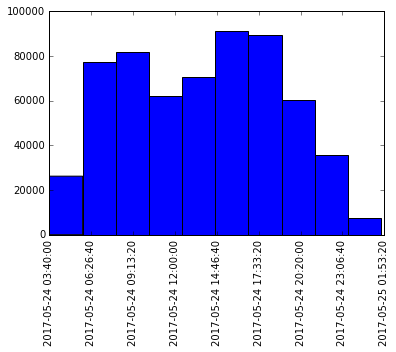

In [198]:
plt.hist([t.timestamp() for t in dataOneDay['Time']])
locs, labels = plt.xticks()
plt.xticks(locs,[datetime.datetime.fromtimestamp(t) for t in locs], rotation='vertical')
plt.show()

### LowFloor

In [177]:
dataRoundedTime = dataOneDay
dataRoundedTime['Time'] = [t - datetime.timedelta(seconds=t.second, microseconds=t.microsecond) for t in dataOneDay['Time']]

D:\Programy\Anaconda\lib\site-packages\pandas\core\indexing.py:461: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


([<matplotlib.axis.XTick at 0x164f746e128>,
 <a list of 11 Text xticklabel objects>)

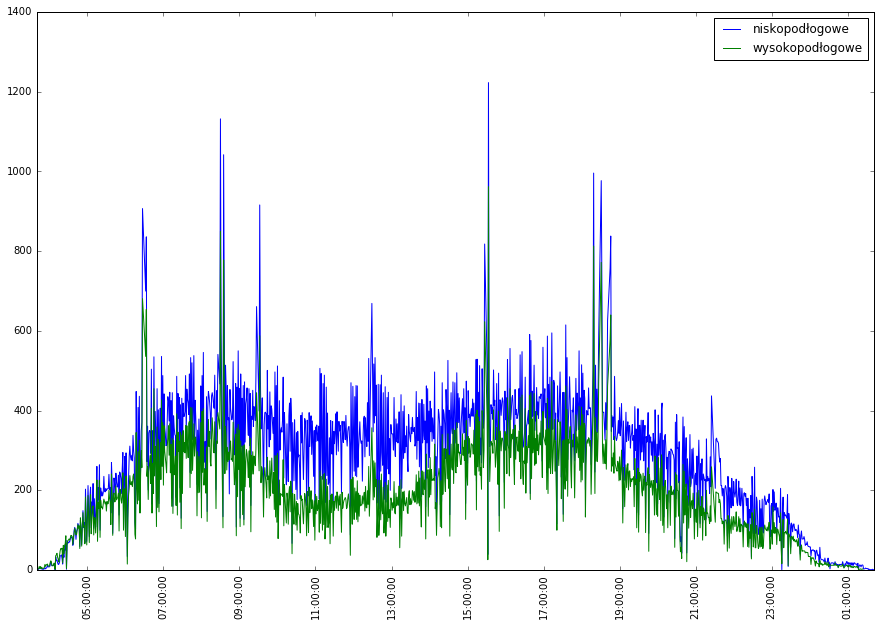

In [206]:
dataLowFloor = dataRoundedTime[dataRoundedTime['LowFloor']].groupby('Time').size()
fig, ax = plt.subplots()
ax.plot(dataLowFloor, label="niskopodłogowe")
dataHighFloor = dataRoundedTime[~dataRoundedTime['LowFloor']].groupby('Time').size()
ax.plot(dataHighFloor, label="wysokopodłogowe")
legend = ax.legend(loc='upper right')
locs, labels = plt.xticks()
plt.xticks(locs, rotation='vertical')

In [28]:
lowFloorByLine = data.groupby('FirstLine').LowFloor.agg(['sum', 'count'])
lowFloorByLine['LowFloorFraction'] = lowFloorByLine['sum'] / lowFloorByLine['count']
lowFloorByLine.sort_values('LowFloorFraction', ascending=False, inplace=True)
lowFloorByLine = lowFloorByLine.reset_index()

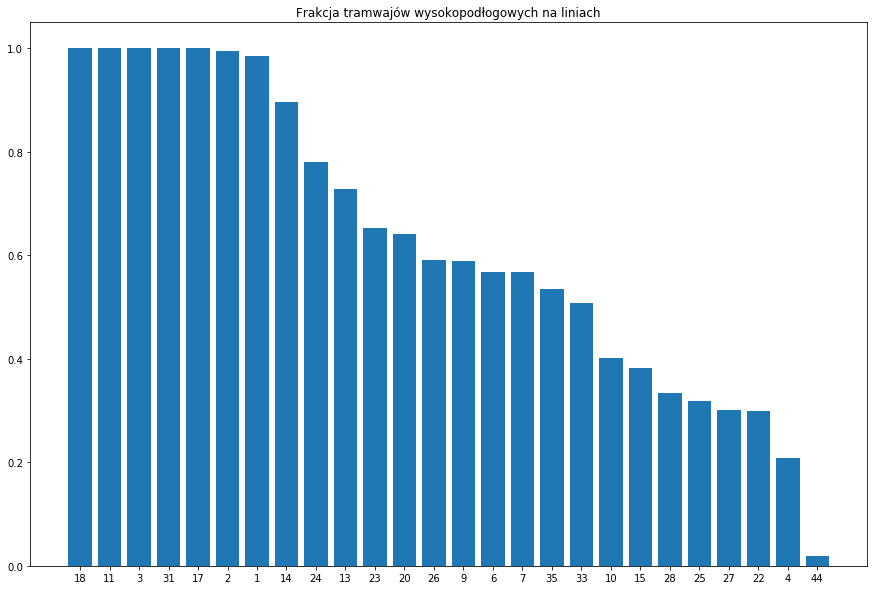

In [35]:
plt.bar(list(range(len(lowFloorByLine))), lowFloorByLine['LowFloorFraction'], tick_label=lowFloorByLine['FirstLine'])
plt.title("Frakcja tramwajów wysokopodłogowych na liniach")

Procentowo najwięcej wysokopodłogowych tramwajów kursuje na linii 44 - linii okresowej.